<h1>Assignment 8: programming</h1>

This is the programming part of Assignment 8. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code behaves as you expect. There is a theoretical part of the assignment also, found in the Handouts folder on CoCalc, which must be handed in at the <i>start</i> of class on Wednesday, December 4. This programming assignment will be collected late at night on Friday, December 6.

In [1]:
import numpy as np
np.set_printoptions(precision=8)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

<h2>1. Integration of IVPs in one variable by explicit methods</h2>
<h4>a.</h4>
Complete the following functions to implement the explicit Euler method, the explicit trapezoid method, and the 4th order Runge-Kutta method.

In [2]:
def euler(f,x0,t0,h,N):
     
    # INPUTS 
    # f is a function name where f(t,x) is the righthand side of the ODE to be integrated
    # x0 is the initial condition
    # t0 is the initial time
    # h is the time step size
    # N is the number of time steps to take
    
    # OUTPUTS
    # t is a numpy array of N+1 time values, including t0
    # x is a numpy array of N+1 x values, including x0
    x = np.zeros(N+1)
    t = np.zeros(N+1)
    x[0] = x0
    t[0] = t0
    for i in range(1,N+1):
        x[i] = x[i-1] + h*f(t[i-1],x[i-1])
        t[i] = t[i-1]+h
    
    return t, x

def trap(f,x0,t0,h,N):

    # your code here
    x = np.zeros(N+1)
    t = np.zeros(N+1)
    x[0] = x0
    t[0] = t0
    for i in range(1,N+1):
        x[i] = x[i-1] + (h/2)*(f(t[i-1],x[i-1])+f(t[i-1]+h , x[i-1]+h*f(t[i-1],x[i-1])))
        t[i] = t[i-1]+h
        
    return t, x

def rk4(f,x0,t0,h,N):

    x = np.zeros(N+1)
    t = np.zeros(N+1)
    x[0] = x0
    t[0] = t0
    for i in range(1,N+1):
        s1 = f(t[i-1],x[i-1])
        s2 = f(t[i-1]+(h/2) , x[i-1]+ (h/2)*s1)
        s3 = f(t[i-1]+(h/2) , x[i-1]+ (h/2)*s2)
        s4 = f(t[i-1] + h ,x[i-1] + h*s3)
        x[i] = x[i-1] + (h/6)*(s1 + 2*s2 + 2*s3 + s4)
        t[i] = t[i-1]+h
    # your code here
    
    return t, x

The following code should use each of the three methods to integrate $x'= -4t^3x^2$ with initial condition $x(-2)=1/17$, up to $t=2$ with time step $h=0.05$.

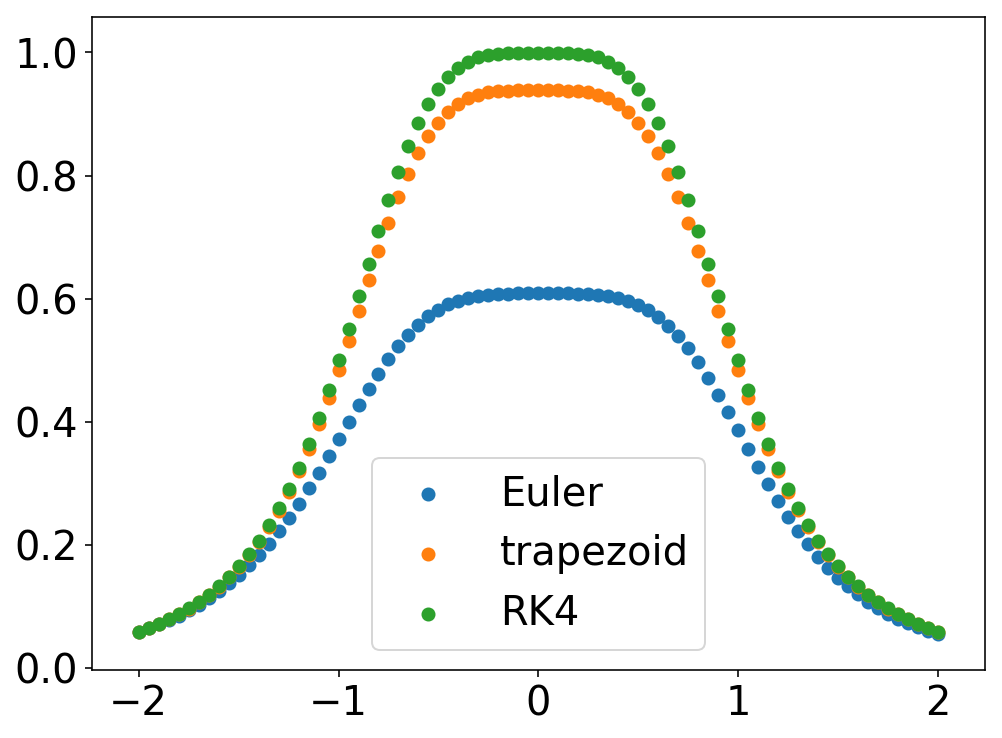

In [3]:
def g(t,x):
    return -4 * t**3 * x**2

t_euler, x_euler = euler(g,1/17,-2,.05,80)
t_trap, x_trap = trap(g,1/17,-2,.05,80)
t_rk4, x_rk4 = rk4(g,1/17,-2,.05,80)

plt.figure(figsize=(8,6))
plt.scatter(t_euler,x_euler,label='Euler')
plt.scatter(t_trap,x_trap,label='trapezoid')
plt.scatter(t_rk4,x_rk4,label='RK4')
plt.legend();

<h4>b.</h4>
For the same IVP from part <i>a</i>, use each of the three methods to integrate up to $t=0$ using $h=2^{-4}, 2^{-5}, 2^{-6}, 2^{-7}, 2^{-8}, 2^{-9}, 2^{-10}$. For each vale of $h$, compute the global error at $t=0$. (The exact answer is $x(0)=1$.) On a single plot with log-log axes, plot absolute global error versus $1/h$ for each of the three methods.

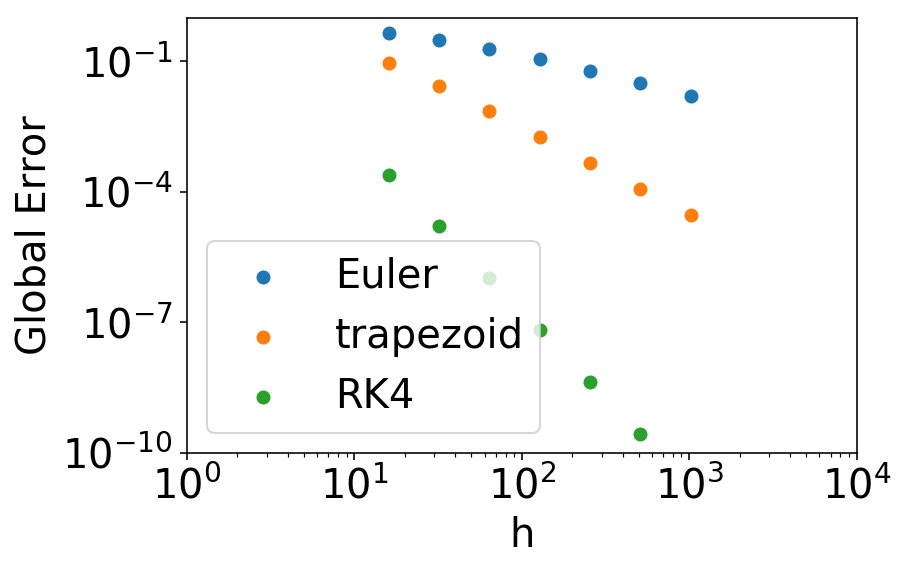

In [4]:
h = np.array((2**4,2**5,2**6,2**7,2**8,2**9,2**10))
GE_E = np.zeros(len(h))
GE_T = np.zeros(len(h))
GE_R = np.zeros(len(h))
for i in range(len(h)):    
    t_euler, x_euler = euler(g,1/17,-2,1/h[i],2*h[i])
    t_trap, x_trap = trap(g,1/17,-2,1/h[i],2*h[i])
    t_rk4, x_rk4 = rk4(g,1/17,-2,1/h[i],2*h[i])
    GE_E[i] = abs(x_euler[-1] -1)
    GE_T[i] = abs(x_trap[-1] -1)
    GE_R[i] = abs(x_rk4[-1] -1)
plt.figure()
plt.scatter(h,GE_E,label='Euler')
plt.scatter(h,GE_T,label='trapezoid')
plt.scatter(h,GE_R,label='RK4')
plt.xlabel("h")
plt.ylabel("Global Error")
plt.axis([1e0,1e4,1e-10,1e0])
plt.xscale('log')
plt.yscale('log')

plt.legend();

<h4>c.</h4>
So far we have been approximating slopes of lines by eye, but we should really use least squares. For each of the three series of data points in part <i>b</i>, we want values $c_0, c_1$ such that the relation $\log(error)=c_0 + c_1\log(1/h)$ holds at all seven data points. These constraints give an inconsistent linear system (with a matrix $A$ that is $7\times2$), so find the least squares solution $[c_0^*~c_1^*]$ by any method you want. Assuming each of the three methods has global error of the form $Ch^p$, what three values of $p$ are implied by your least squares solutions (i.e. what are the values of $c_1^*$)?

In [5]:
Ones = np.ones(np.size(GE_E))
A_t = np.transpose(np.log(h))
b1 = np.log(GE_E)
b2 = np.log(GE_T)
b3 = np.log(GE_R)
A = np.column_stack((A_t, Ones))
C1 = np.linalg.lstsq(A,b1,rcond=None)[0]
C2 = np.linalg.lstsq(A,b2,rcond=None)[0]
C3 = np.linalg.lstsq(A,b3,rcond=None)[0]

Assign the following variables to record the exponents $p$ of your least squares fits. (These $p$ values should be positive.)

In [6]:
p_euler = np.abs(C1[0])
p_trap = np.abs(C2[0])
p_rk4 = np.abs(C3[0])
print(p_euler)
print(p_trap)
print(p_rk4)

0.8037215186900668
1.9460617774670628
3.9661922997702055


<h2>2. Systems of ODEs</h2>
<h4>a.</h4>
Complete the following generalization of your <tt>rk4</tt> function that will work also for systems of ODEs. That is, $\mathbf{x}\in\mathbb R^n$ and the function $f(t,\mathbf{x})$ returns a vector of the same length.

In [7]:
def rk4n(f,x0,t0,h,N):
    
    # INPUTS 
    # f is a function name where f(t,x) is the righthand side of the ODE system
    # x0 is the initial condition with dimension n-by-1
    # t0 is the initial time
    # h is the time step size
    # N is the number of time steps to take

    # OUTPUTS
    # t is a numpy array of N+1 time values
    # x is a numpy array of shape n-by-(N+1)
    # your code here
    m = np.size(x0)
    k1 = np.zeros(m)
    k2 = np.zeros(m)
    k3 = np.zeros(m)
    k4 = np.zeros(m)
    xk = np.zeros(m)
    x = np.zeros(shape=(m,N+1))
    t = np.zeros(N+1)
    x[:,0] = x0[:]
    t[0] = t0
    for i in range(1,N+1):
        k1[:] = f(t[i-1],x[:,i-1]*h)
        for j in range(m):
            xk[j] = x[j,i-1]+ k1[j]/2
        k2[:] = f(t[i-1],xk*h)
        for j in range(m):
            xk[j] = x[j,i-1]+ k2[j]/2
        k3[:] = f(t[i-1],xk*h)
        for j in range(m):
            xk[j] = x[j,i-1]+ k3[j]
        k4[:] = f(t[i-1],xk*h)
        for j in range(m):
            x[j,i] = x[j,i-1] + (k1[j] + 2*(k2[j] + k3[j]) + k4[j])/6
        t[i] = t[i-1]+h
    x = np.transpose(x)
    return t, x

The following code should integrate the 2D system $x_1' = x_2, ~x_2'=(1-x_1^2)x_2-x_1$ and plot the resulting solution $x_1(t), x_2(t)$.

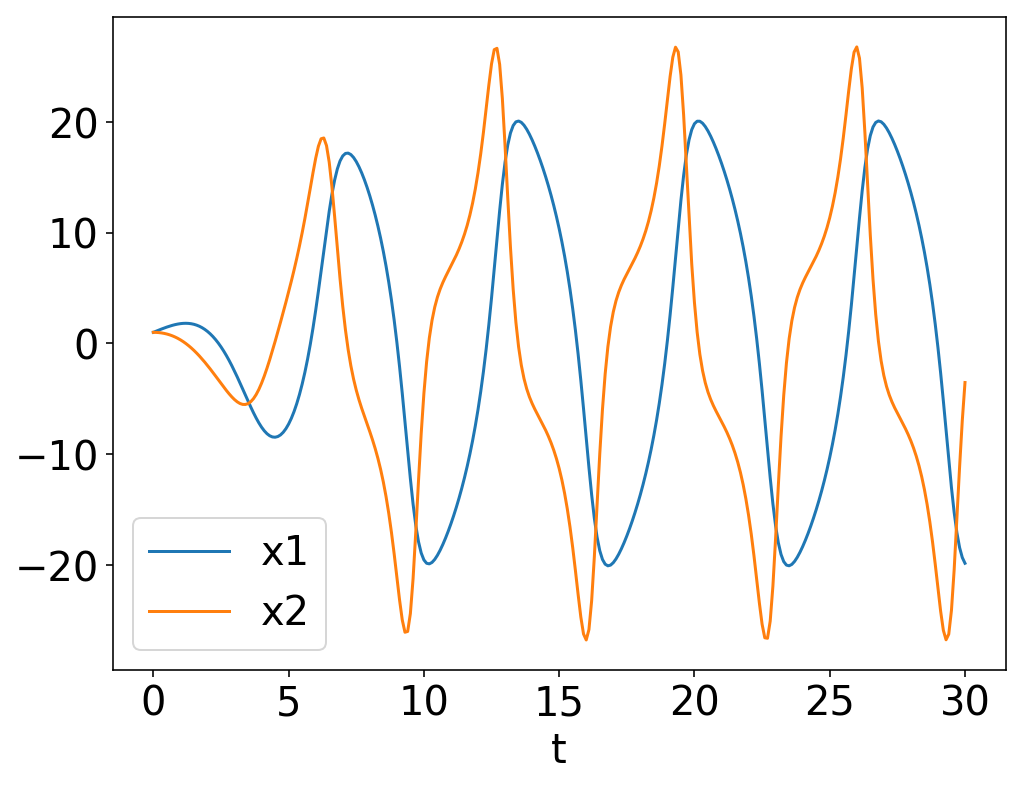

In [8]:
def vdp(t,x): return np.array([ x[1], (1-x[0]**2)*x[1]-x[0] ])

x0 = np.array([1,1])
t_vdp, x_vdp = rk4n(vdp,x0,0,.1,300)

plt.figure(figsize=(8,6))
plt.plot(t_vdp,x_vdp[:,0],label='x1')
plt.plot(t_vdp,x_vdp[:,1],label='x2')
ax = plt.gca()
ax.set_xlabel('t')
plt.legend();

<h4>b.</h4>
In order to better understand the example ODE from part <i>a</i>, compute trajectories over $t\in[0,40]$ starting from each of the follwing initial conditions: 
$$(x_1(0),x_2(0))=(-4,4),(0,4),(4,4),(-4,-4),(0,-4),(4,-4),(-0.1,0),(0.1,0).$$
On a single plot with axes $x_1$ and $x_2$, plot $x_2(t)$ versus $x_1(t)$ for the solutions resulting from each of the 8 initial conditions.

Text(0, 0.5, 'X2')

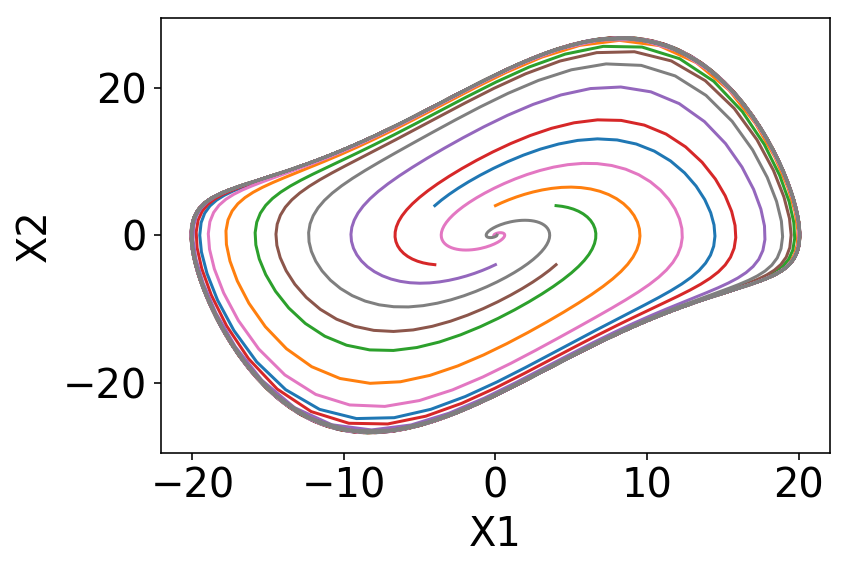

In [9]:
x0 = np.array([[-4,4] , [0,4] , [4,4] , [-4,-4] , [0,-4] , [4,-4] , [-0.1,0] , [0.1,0]])
x = []
n = np.shape(x0)[0]
for i in range(n):
    t_vdp, x_vdp = rk4n(vdp,x0[i],0,.1,400)
    x.append(x_vdp)
plt.figure()
for i in range(n):
    plt.plot(x[i][:,0],x[i][:,1])
ax = plt.gca()
ax.set_xlabel('X1')
ax.set_ylabel('X2')


For any initial condition other than $(0,0)$, what seems to the be the eventual fate of solutions to this nonlinear 2-dimensional system of ODEs?

<h4>c.</h4>
Consider the following system of ODEs.
$$ \tfrac{d}{dt}x = 10(y-x), \quad \tfrac{d}{dt}y = 28x - y - xz, \quad
\tfrac{d}{dt}z = -\tfrac83 z + xy $$
The following code should compute a solution starting from initial condition $(x_0,y_0,z_0)=(15,15,25)$ for $t\in[0,4]$ (because $h=0.01$ and $N=400$). It also plots $x$, $y$, and $z$ versus $t$, as well as a 3D plot showing $(x(t),y(t),z(t))$. See what happens when you integrate for longer, e.g. up to $t=20$ or even longer. See what happens when you change the initial condition.

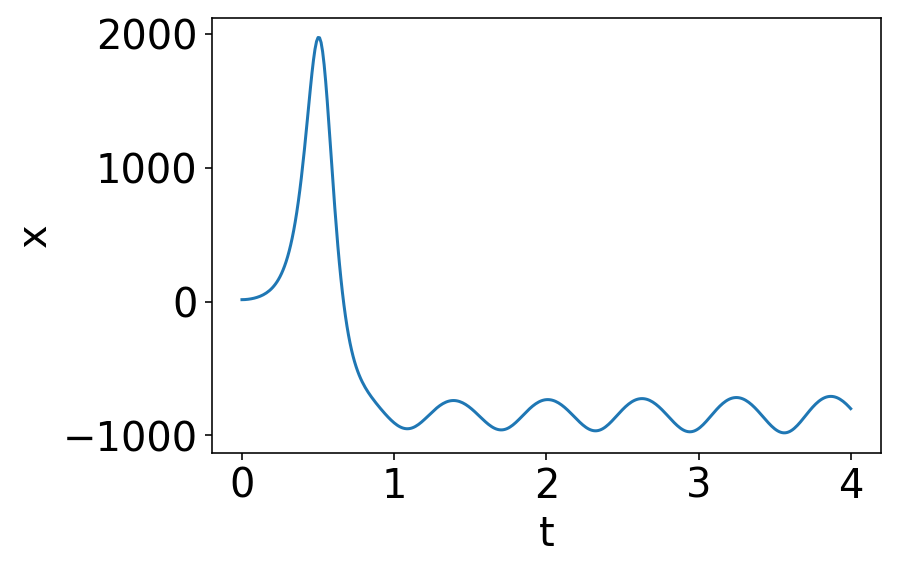

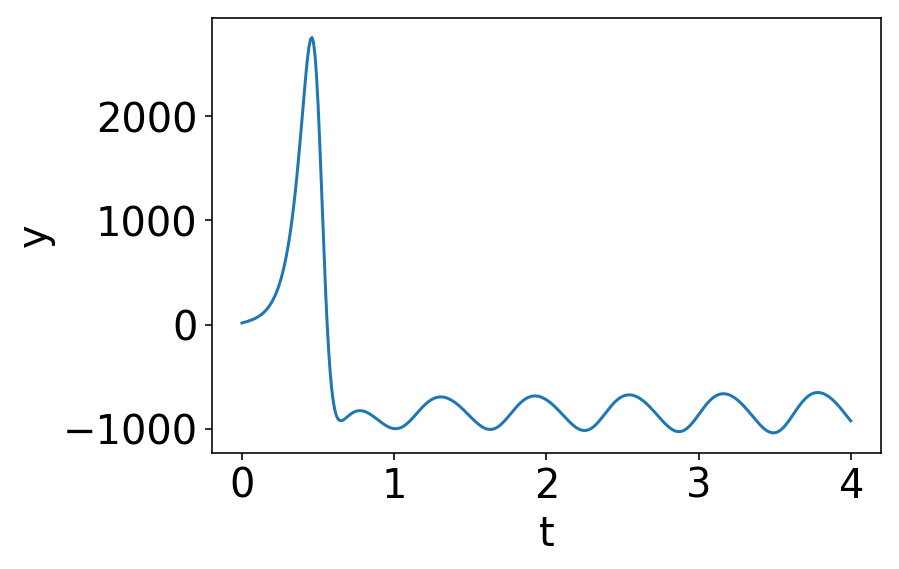

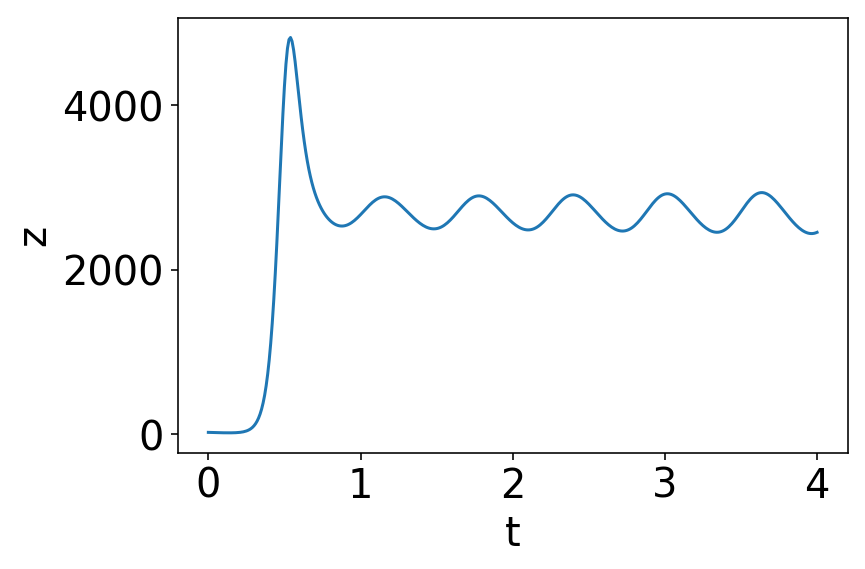

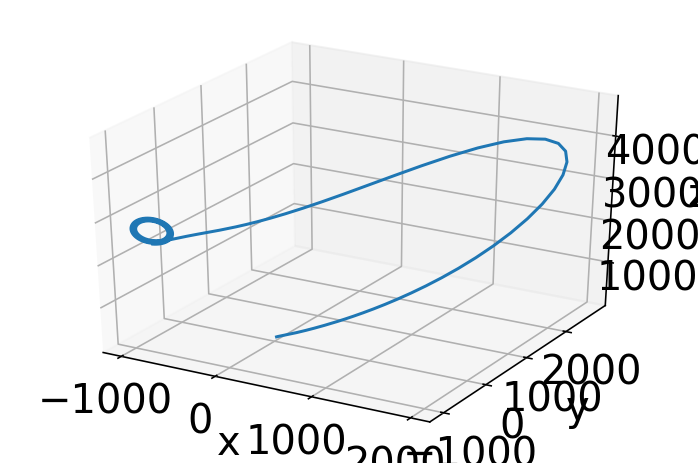

In [10]:
def lor(t,x):
    return np.array([10*(x[1]-x[0]), 28*x[0]-x[1]-x[0]*x[2], -8/3*x[2]+x[0]*x[1] ])

x0 = np.array([15,15,25])
h, N = 0.01, 400
t_lor, x_lor = rk4n(lor,x0,0,h,N)

plt.figure()
plt.plot(t_lor,x_lor[:,0])
plt.xlabel('t'), plt.ylabel('x')

plt.figure()
plt.plot(t_lor,x_lor[:,1])
plt.xlabel('t'), plt.ylabel('y')

plt.figure()
plt.plot(t_lor,x_lor[:,2])
plt.xlabel('t'), plt.ylabel('z')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x_lor[:,0], x_lor[:,1], x_lor[:,2])
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('z');

What seems to be the eventual fate of typical solutions to this nonlinear 3-dimensional system of ODEs?

<h4>d.</h4>
For the 2D system from parts <i>a-b</i>, it can be shown that $(x_1(t),x_2(t))$ remains in a bounded region of $\mathbb R^2$. Likewise, for the 3D system from part <i>c</i>, it can be shown that $(x(t),y(t),z(t))$ remains in a bounded region of $\mathbb R^3$. In each case, the righthand side of the ODE system is Lipschitz continuous on any bounded region, and so solutions starting from different initial conditions can separate no faster than exponentially. (In class we discussed this theorem for ODEs in one variable, but it is true also for n-dimensional systems of ODEs.) This theorem doesn't guarantee that tractories do separate exponentially; they might separate more slowly, or they might get closer together. Let's see what happens in some examples.
<br> <br>
For the 2D system from parts <i>a-b</i>, compute solutions $\mathbf u(t)$ and $\mathbf v(t)$ from initial conditions $\mathbf u_0=[0,4]$ and $\mathbf v_0=[0,4+10^{-12}]$. Plot the Euclidean norm $\Vert\mathbf u(t)-\mathbf v(t)\Vert_2$ (log scale) versus $t\in[0,30]$ (linear scale).

Text(0, 0.5, '||u(t)-v(t)||')

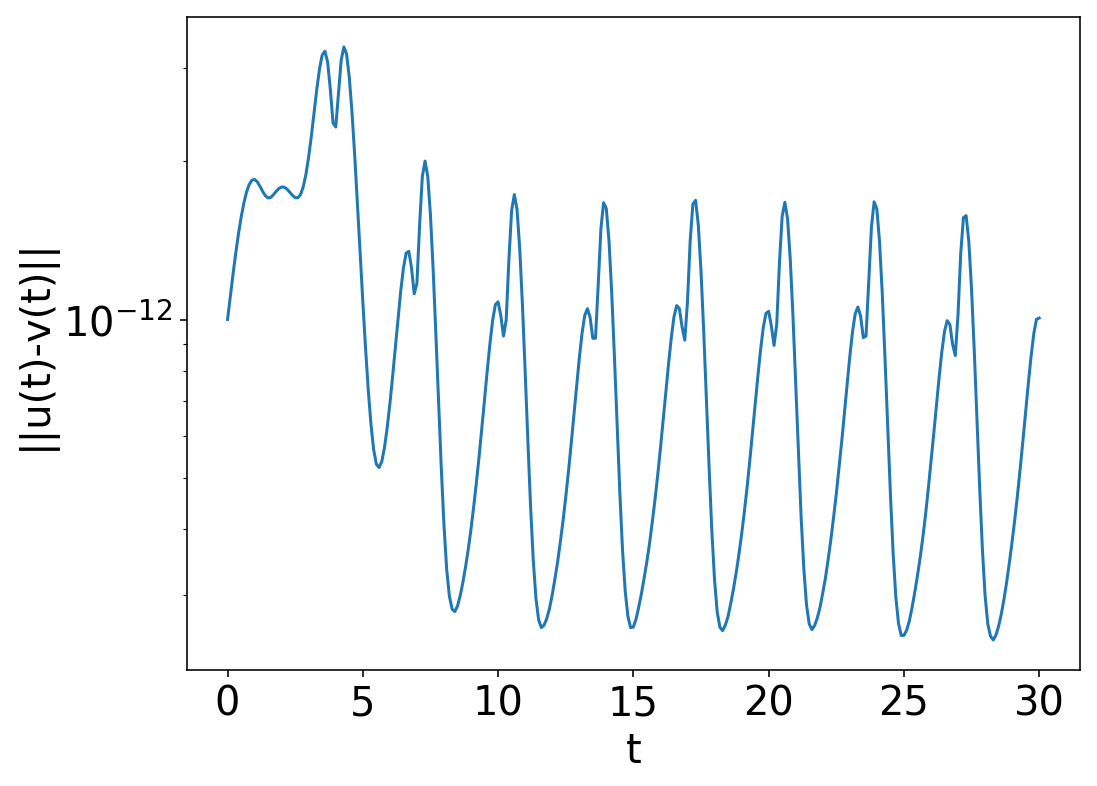

In [11]:
u0 = np.array([0,4])
t_vdp, u_vdp = rk4n(vdp,u0,0,.1,300)
v0 = np.array([0,4+1e-12])
t_vdp, v_vdp = rk4n(vdp,v0,0,.1,300)
plt.figure(figsize=(8,6))
NNN = np.zeros(301)
for i in range(301):
    NNN[i] = np.linalg.norm(u_vdp[i,:]-v_vdp[i,:]) 
plt.plot(t_vdp,NNN)
plt.yscale('log')
ax = plt.gca()
ax.set_xlabel('t')
ax.set_ylabel('||u(t)-v(t)||')

For the 3D system from part <i>c</i>, compute solutions $\mathbf u(t)$ and $\mathbf v(t)$ from initial conditions $\mathbf u_0=[15,15,25]$ and $\mathbf v_0=[15,15,25+10^{-12}]$. Plot the Euclidean norm $\Vert\mathbf u(t)-\mathbf v(t)\Vert_2$ (log scale) versus $t\in[0,80]$ (linear scale).

Text(0, 0.5, '||u(t)-v(t)||')

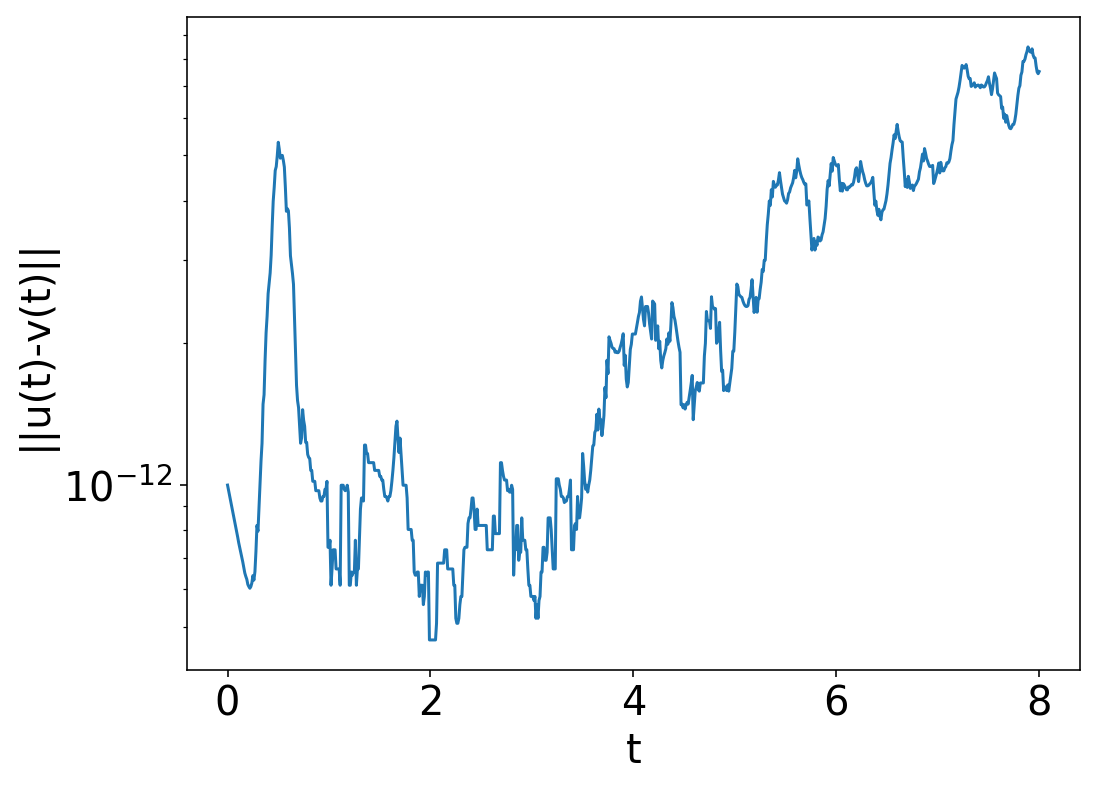

In [12]:
u0 = np.array([15,15,25])
v0 = np.array([15,15,25+1e-12])
h, N = 0.01, 800
t_lor, u_lor = rk4n(lor,u0,0,h,N)
t_lor, v_lor = rk4n(lor,v0,0,h,N)

plt.figure(figsize=(8,6))
NNN = np.zeros(N+1)
for i in range(N+1):
    NNN[i] = np.linalg.norm(u_lor[i,:]-v_lor[i,:]) 
plt.plot(t_lor,NNN)
plt.yscale('log')
ax = plt.gca()
ax.set_xlabel('t')
ax.set_ylabel('||u(t)-v(t)||')

Based on your plots, in which system would it be impossible to predict the distant future – the 2D sysem or the 3D system?

2D